# Initialize and Setup

In [1]:
import os
import time

import numpy as np
from sklearn.tree import DecisionTreeClassifier

import ml_util as utl

save_directory = "figures/DecisionTree"
model_name = "Decision Tree"

folders = ["figures/DecisionTree/Complexity_Analysis",
           "figures/DecisionTree/Grid_Search_Results",
           "figures/DecisionTree/Learning_Curves",
           "figures/DecisionTree/Confusion_Matrix",
           "figures/DecisionTree/Metrics"]

directories = {
    "Save Directory": "figures/DecisionTree",
    "Initial Complexity Analysis": "figures/DecisionTree/Initial Complexity Analysis",
    "Grid Search Results": "figures/DecisionTree/Grid Search Results",
    "Learning Curves": "figures/DecisionTree/Learning Curves",
    "Final Complexity Analysis": "figures/DecisionTree/Final Complexity Analysis"
}

Random_Number = 42
TESTING = False
cv = 5
n_jobs = -1
np.random.seed(42)
get_ipython().system('pip install pyarrow')

<Figure size 1600x1200 with 0 Axes>

In [2]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
train_X, train_y, valid_X, valid_y, test_X, test_y = utl.split_data(gathered_data["MNIST"]["X"],
                                                                    gathered_data["MNIST"]["y"], normalize=True)
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [3]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")


figures/DecisionTree folder already exists.
figures/DecisionTree/Complexity_Analysis folder already exists.
figures/DecisionTree/Grid_Search_Results folder already exists.
figures/DecisionTree/Learning_Curves folder already exists.
figures/DecisionTree/Confusion_Matrix folder already exists.
figures/DecisionTree/Metrics folder already exists.


In [ ]:
# Criterion ~ entropy' is for information gain

# Max Depth ~ None is default. Can be used for pre pruning the tree

# Min Samples Leaf ~ 1 this is the minimum number of samples required to be a leaf node.


In [25]:
val = 4000
pred_val = 4000
train_sizes = np.linspace(0.05, 1.00, 20)
print(train_sizes)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]


# Initial Model Complexity

### Model Complexity Max Depth
best depth 10

In [49]:
parameter_range = np.arange(1, 20, 1)
    
param_name = "max_depth"
param_name_plot = "Max Depth"
mnist_train_results = None
mnist_test_results = None
fashion_train_results = None
fashion_test_results = None

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    1.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  36 out of  95 | elapsed:    2.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  56 out of  95 | elapsed:    3.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  76 out of  95 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    2.7s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done  36 out of  95 | elapsed:    5.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  56 out of  95 | elapsed:    8.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  76 out of  95 | elapsed:   12.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   15.2s finished


Run Time: 25.291261434555054s


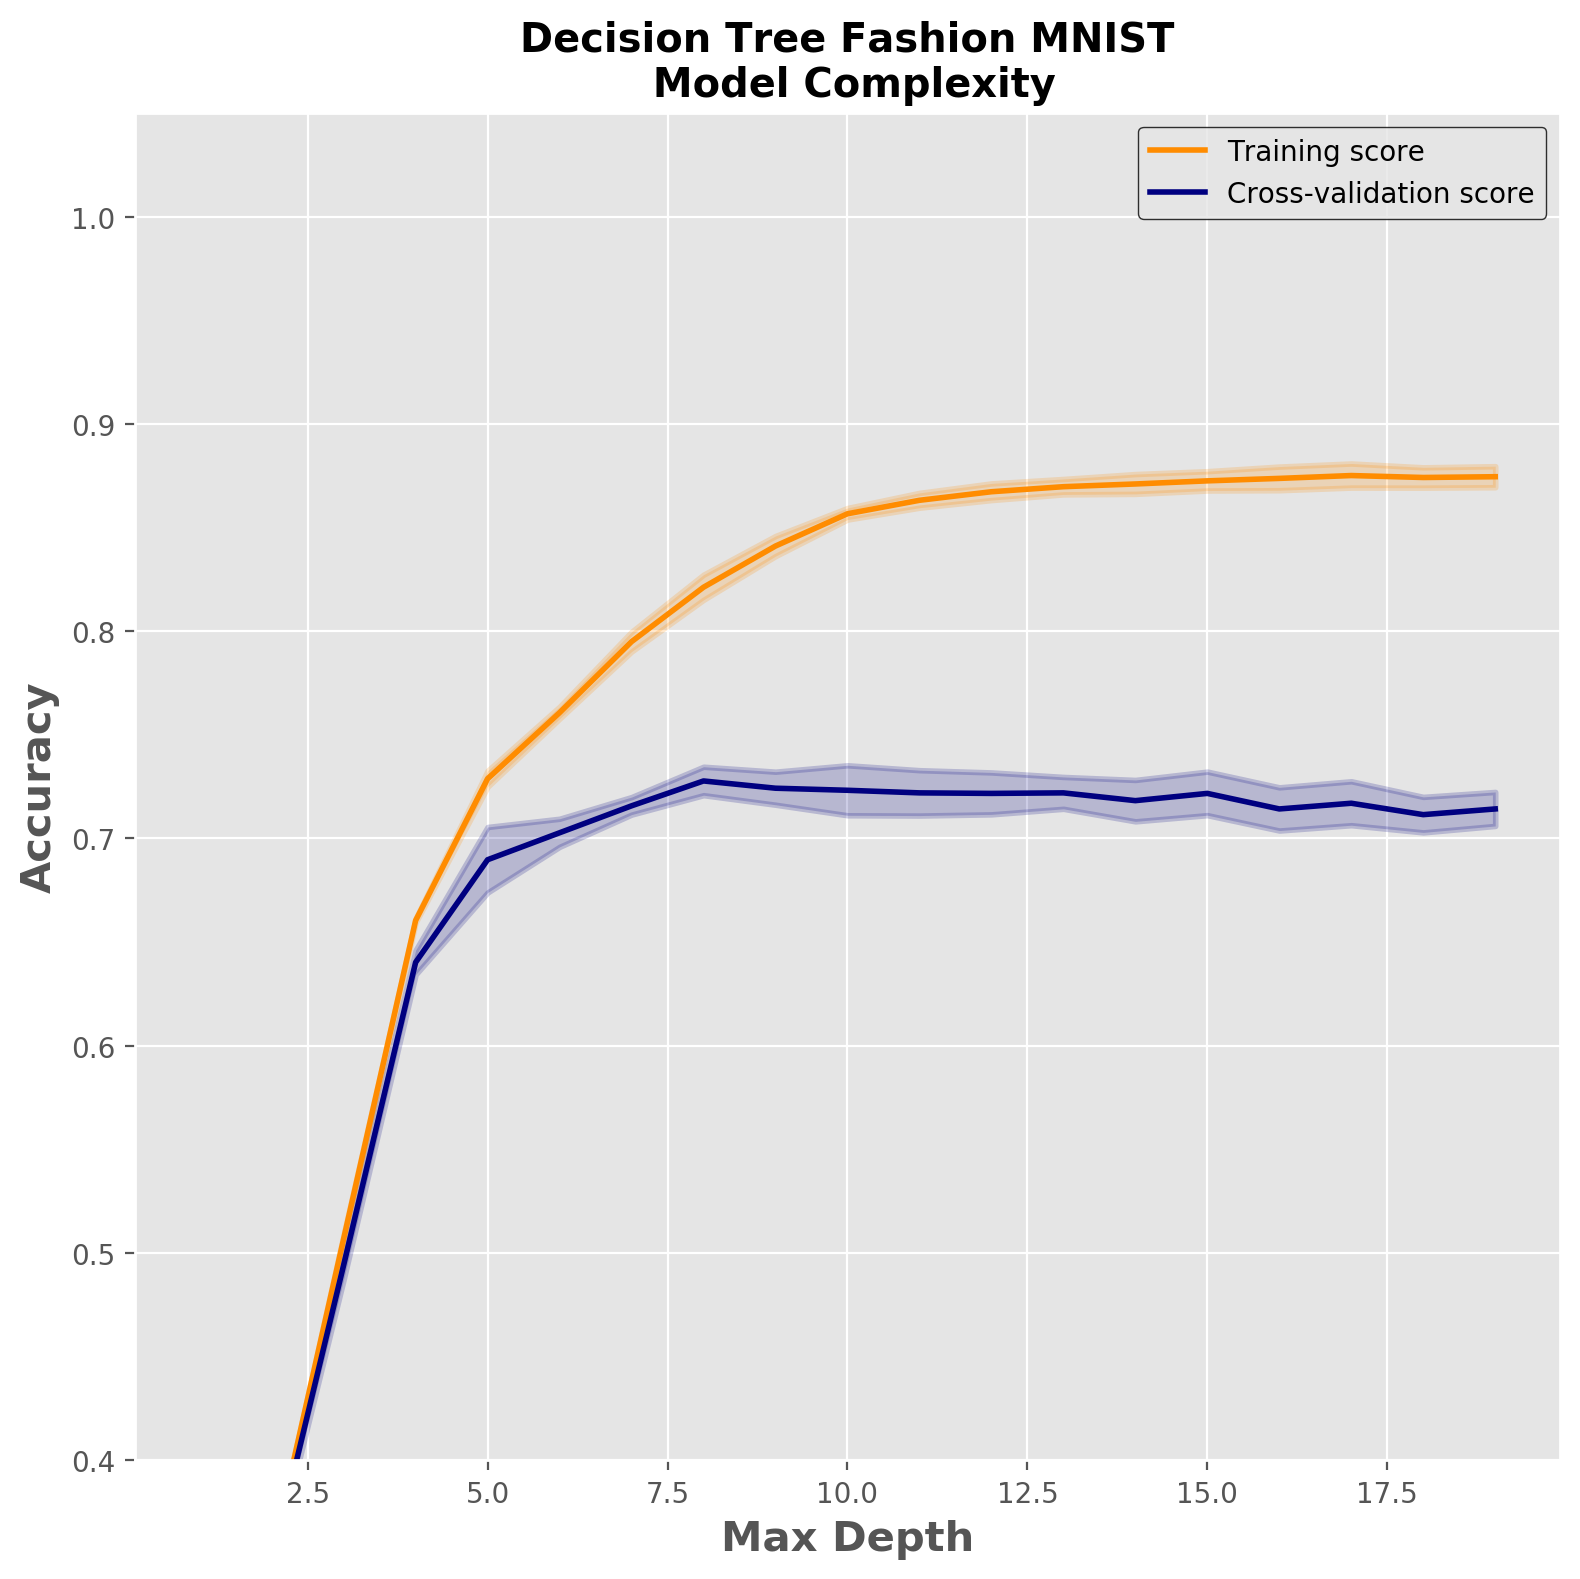

In [53]:

start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        ex="max_depth_MNIST"
        clf = DecisionTreeClassifier(splitter='best', min_samples_split=0.03)
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        ex="max_depth_FASHION_MNIST"
        f_name = f"{model_name}_{param_name}_Fashion_MNIST_{ex}"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        clf = DecisionTreeClassifier(splitter='best', min_samples_split=0.01)
    
    temp_train, temp_test = utl.get_model_complexity(classifier=clf,
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=cv, fileName=ex,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, is_SVM=False,
                                                     extra_name="Depth_Initial", folder="DecisionTree")
    if i == 0:
        mnist_train_results = temp_train
        mnist_test_results = temp_test
    else:
        fashion_train_results = temp_train
        fashion_test_results = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

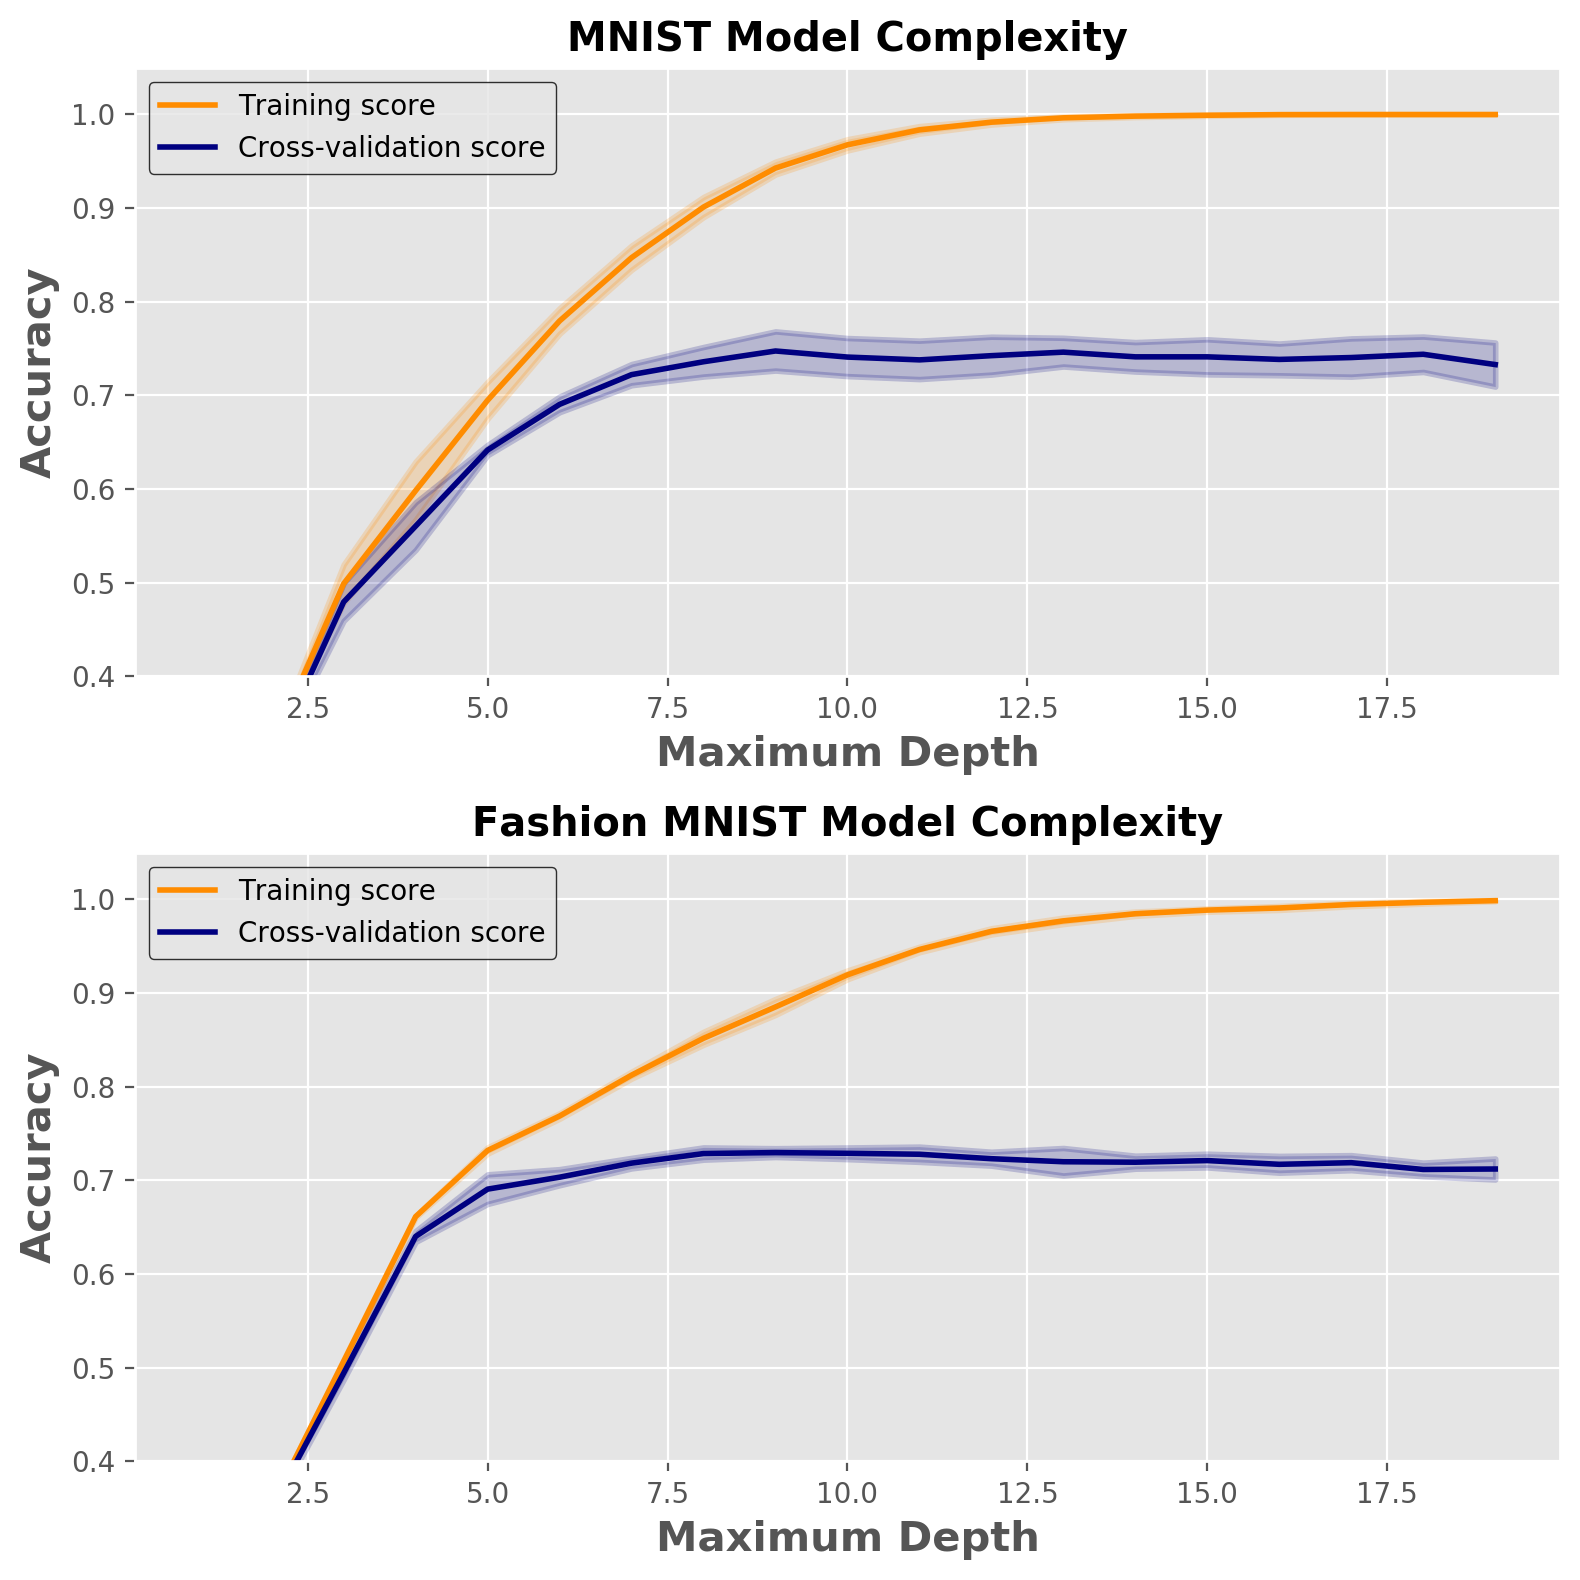

In [13]:
utl.plot_combined_complexity("DecisionTree", "Maximum Depth", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="DecisionTree", extra_name="Max_Depth_Initial",)
utl.plot_combined_complexity("DecisionTree", "Maximum Depth", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             folder="DecisionTree", extra_name="Max Depth Initial_Fashion",)

### Model Complexity of Min Samples Leaf:

best min_samples_leaf = 0.001

In [16]:
if TESTING:
    parameter_range = 10.** np.arange(-2, 0, 1)
else:
    parameter_range = 10.** np.arange(-5, 0, 1)

# a = 10.** np.arange(-5, 0, 1)
parameter_range = np.arange(1, 30, 1)
    
param_name = "min_samples_leaf"
param_name_plot = "Minimum Samples for Leaf"
mnist_train_results_leaf = None
mnist_test_results_leaf = None
fashion_train_results_leaf = None
fashion_test_results_leaf = None

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of 145 | elapsed:    3.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  56 out of 145 | elapsed:    4.7s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  86 out of 145 | elapsed:    6.7s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 116 out of 145 | elapsed:    8.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of 145 | elapsed:    4.9s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  56 out of 145 | elapsed:    8.8s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  86 out of 145 | elapsed:   13.6s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done 116 out of 145 | elapsed:   18.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   22.9s finished


Run Time: 37.67177772521973s


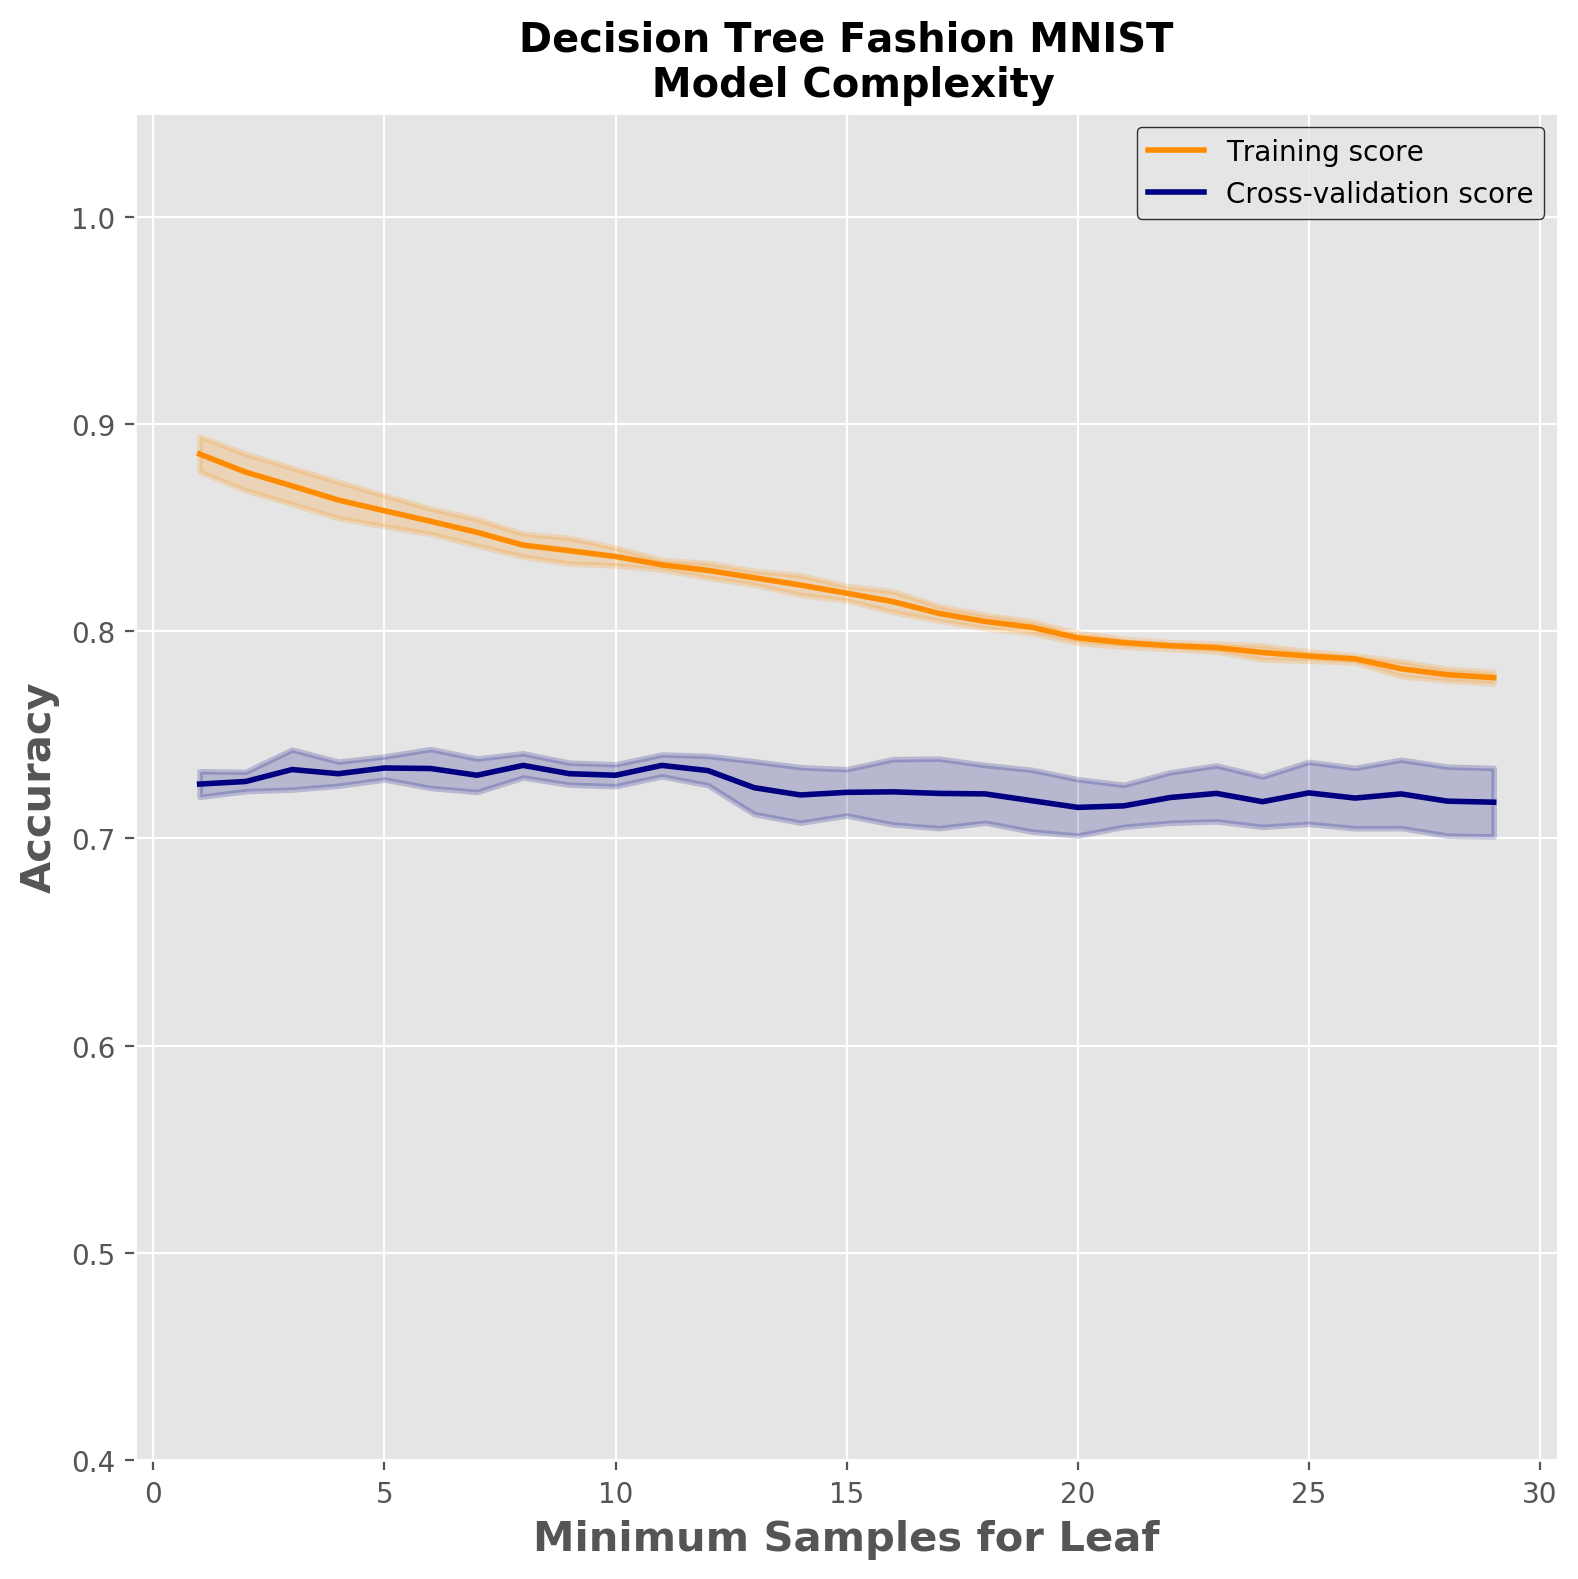

In [18]:

start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_MNIST_c"
        algorithm_name = f"{model_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        clf = DecisionTreeClassifier(splitter='best', max_depth=8)
        ex = "MNIST_MinSampleLeaf"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_Fashion_MNIST_d"
        algorithm_name = f"{model_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        clf = DecisionTreeClassifier(splitter='best', max_depth=9)
        ex = "FashionMNIST_MinSampleLeaf"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=clf,
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=5, use_log_x=False, fileName=ex,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, is_SVM=False,
                                                     extra_name="Min_Leaf_Initial", folder="DecisionTree")
    if i == 0:
        mnist_train_results_leaf = temp_train
        mnist_test_results_leaf = temp_test
    else:
        fashion_train_results_leaf = temp_train
        fashion_test_results_leaf = temp_test
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

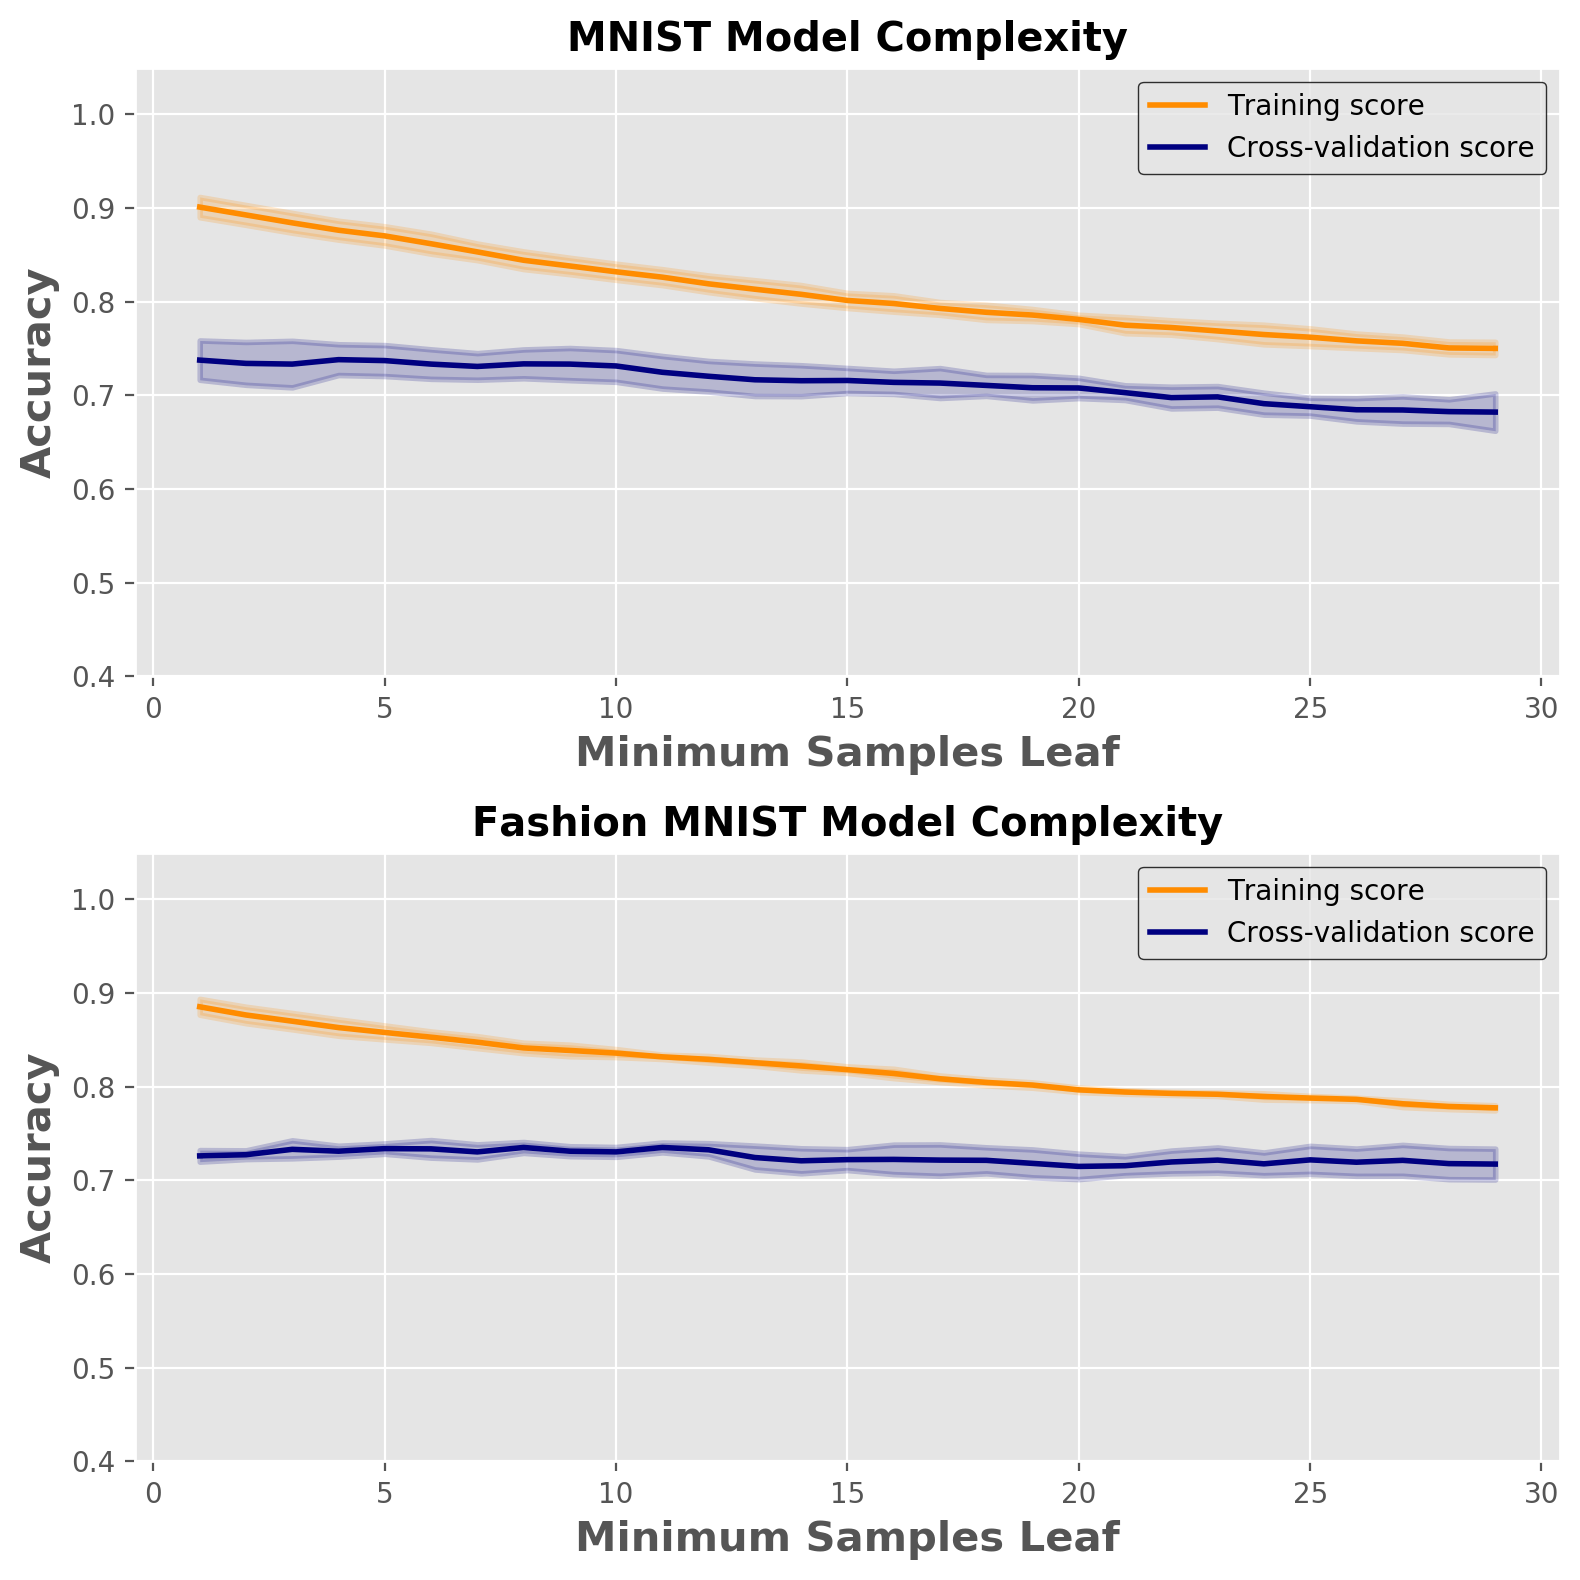

In [19]:
utl.plot_combined_complexity("DecisionTree", "Minimum Samples Leaf", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results_leaf, mnist_test_complex=mnist_test_results_leaf,
                             fashion_train_complex=fashion_train_results_leaf, extra_name="another_2",
                             fashion_test_complex=fashion_test_results_leaf, folder="DecisionTree")
utl.plot_combined_complexity("DecisionTree", "Minimum Samples Leaf", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results_leaf, mnist_test_complex=mnist_test_results_leaf,
                             fashion_train_complex=fashion_train_results_leaf, extra_name="another",
                             fashion_test_complex=fashion_test_results_leaf, folder="DecisionTree")

### Model Complexity of Min Samples Split
best min_samples_split = 2

In [39]:
if TESTING:
    parameter_range = np.arange(1, 3, 1)
else:
    parameter_range = np.arange(5, 201, 5)

parameter_range = 10. ** np.arange(-4, 1, 0.1)   
p = np.sort(np.hstack((parameter_range, parameter_range*3, parameter_range*7)))
    
param_name = "min_samples_split"
param_name_plot = "Minimum Samples for Split"
mnist_train_results_split = None
mnist_test_results_split = None
fashion_train_results_split = None
fashion_test_results_split = None

In [40]:
parameter_range

array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
       3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01,
       1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 250 | elapsed:    3.0s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  98 out of 250 | elapsed:    5.9s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done 149 out of 250 | elapsed:    8.7s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 200 out of 250 | elapsed:   11.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 250 | elapsed:    7.3s remaining:   31.5s
[Parallel(n_jobs=-1)]: Done  98 out of 250 | elapsed:   14.8s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done 149 out of 250 | elapsed:   22.3s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done 200 out of 250 | elapsed:   29.8s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   37.1s finished


Run Time: 56.78514385223389s


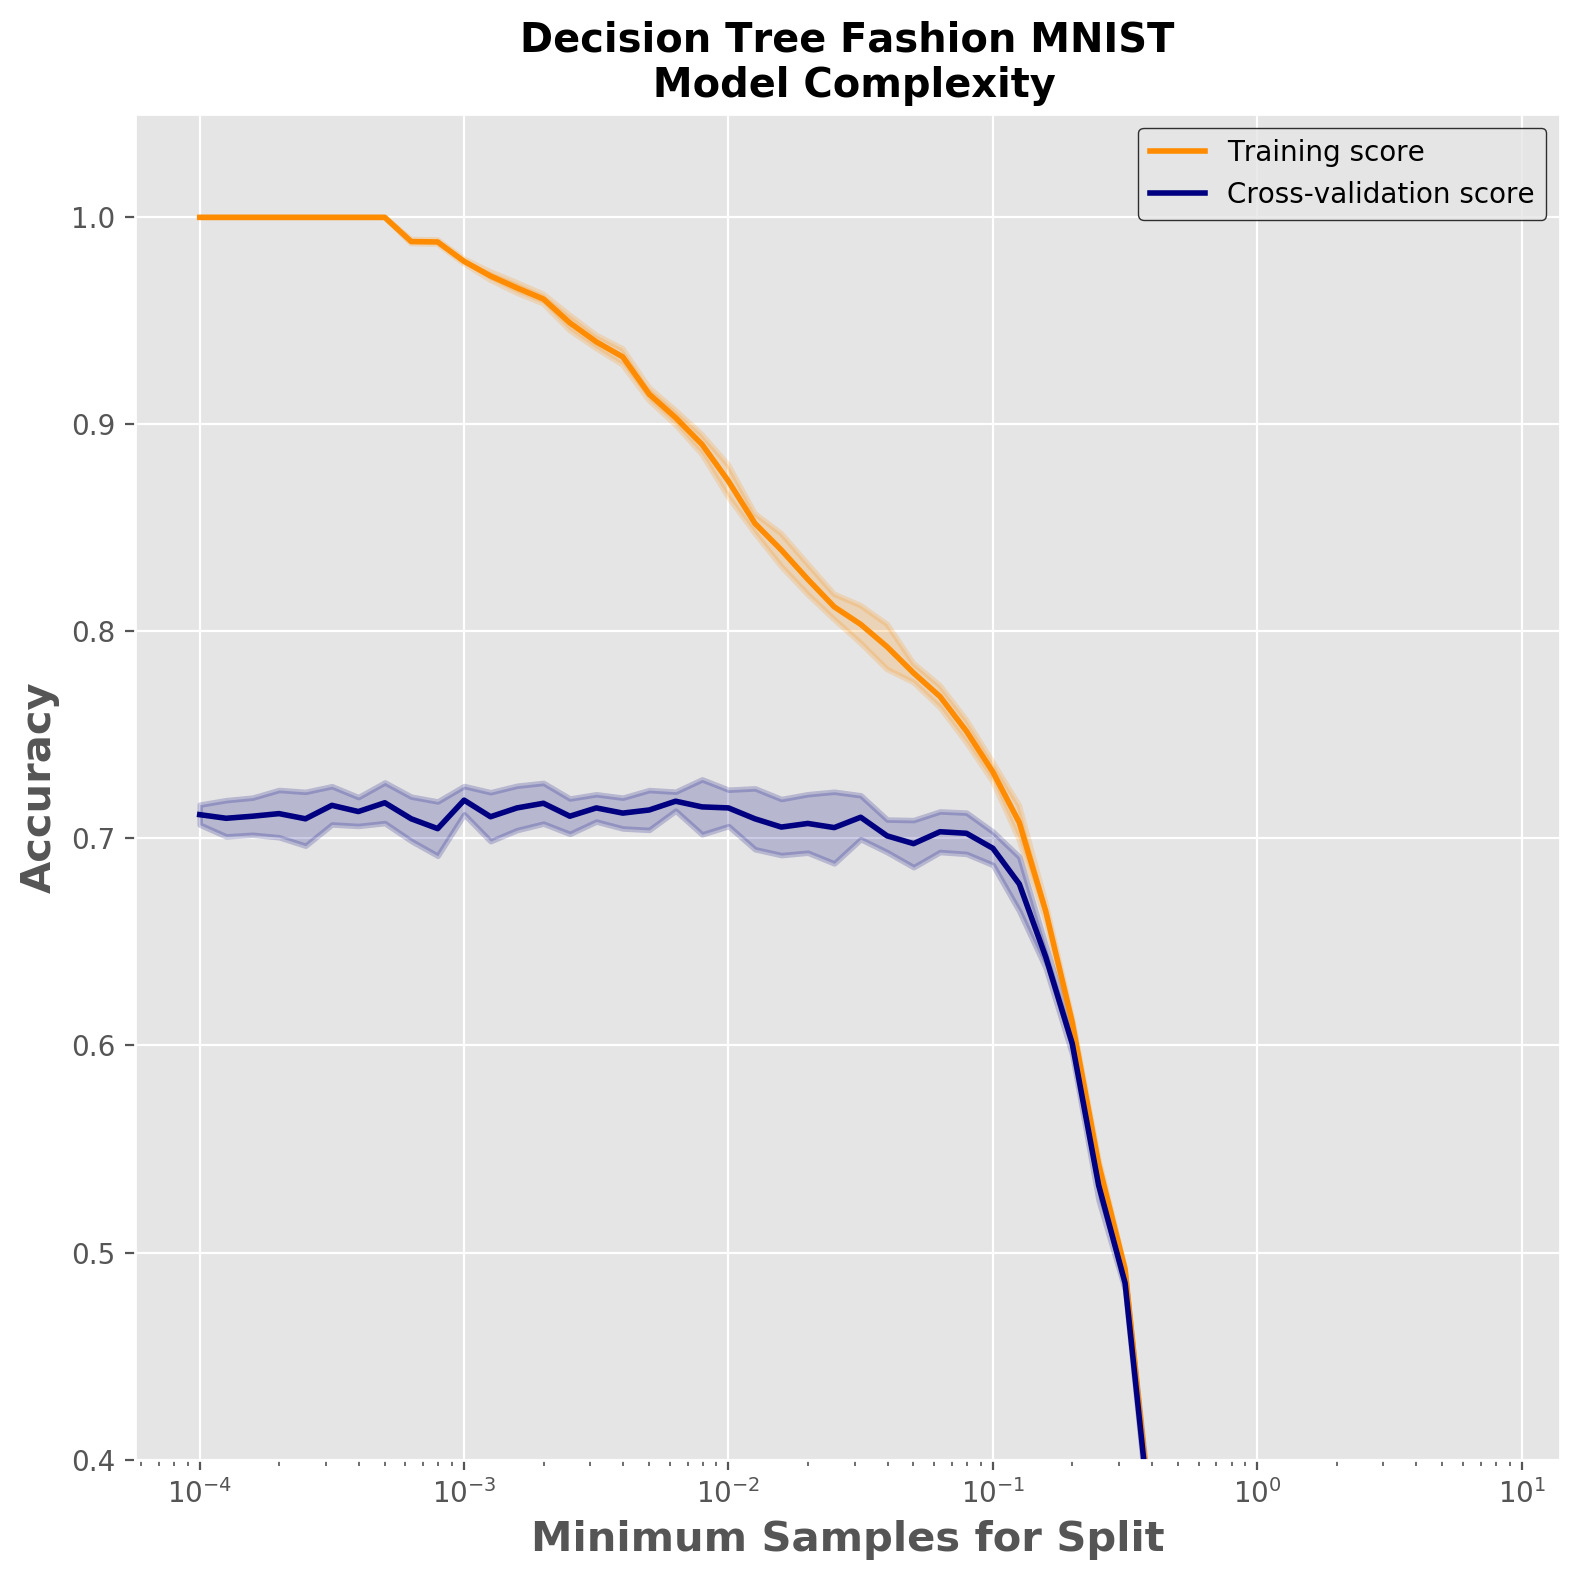

In [41]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_MNIST_c"
        algorithm_name = f"{model_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        clf = DecisionTreeClassifier(splitter='best', max_depth=8, min_samples_split=0.003)
        ex = "MNIST_MinSampleSplit"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_Fashion_MNIST_d"
        algorithm_name = f"{model_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        clf = DecisionTreeClassifier(splitter='best', max_depth=9)
        ex = "FashionMNIST_MinSampleSplit"
    
    temp_train, temp_test = utl.get_model_complexity(classifier=DecisionTreeClassifier(splitter='best'),
                                                     train_X=temp_train_X,
                                                     train_y=temp_train_y, parameter_name=param_name,
                                                     save_dir=save_directory,
                                                     algorithm_name=algorithm_name, parameter_range=parameter_range,
                                                     cv=cv,use_log_x=True,
                                                     n_jobs=n_jobs, verbose=5, backend='loky',
                                                     param_name_for_plot=param_name_plot,
                                                     f_name=f_name, plot_title=plot_title, is_SVM=False,
                                                     extra_name="Min_Split_Initial", folder="DecisionTree")
    if i == 0:
        mnist_train_results_split = temp_train
        mnist_test_results_split = temp_test
    else:
        fashion_train_results_split = temp_train
        fashion_test_results_split = temp_test
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


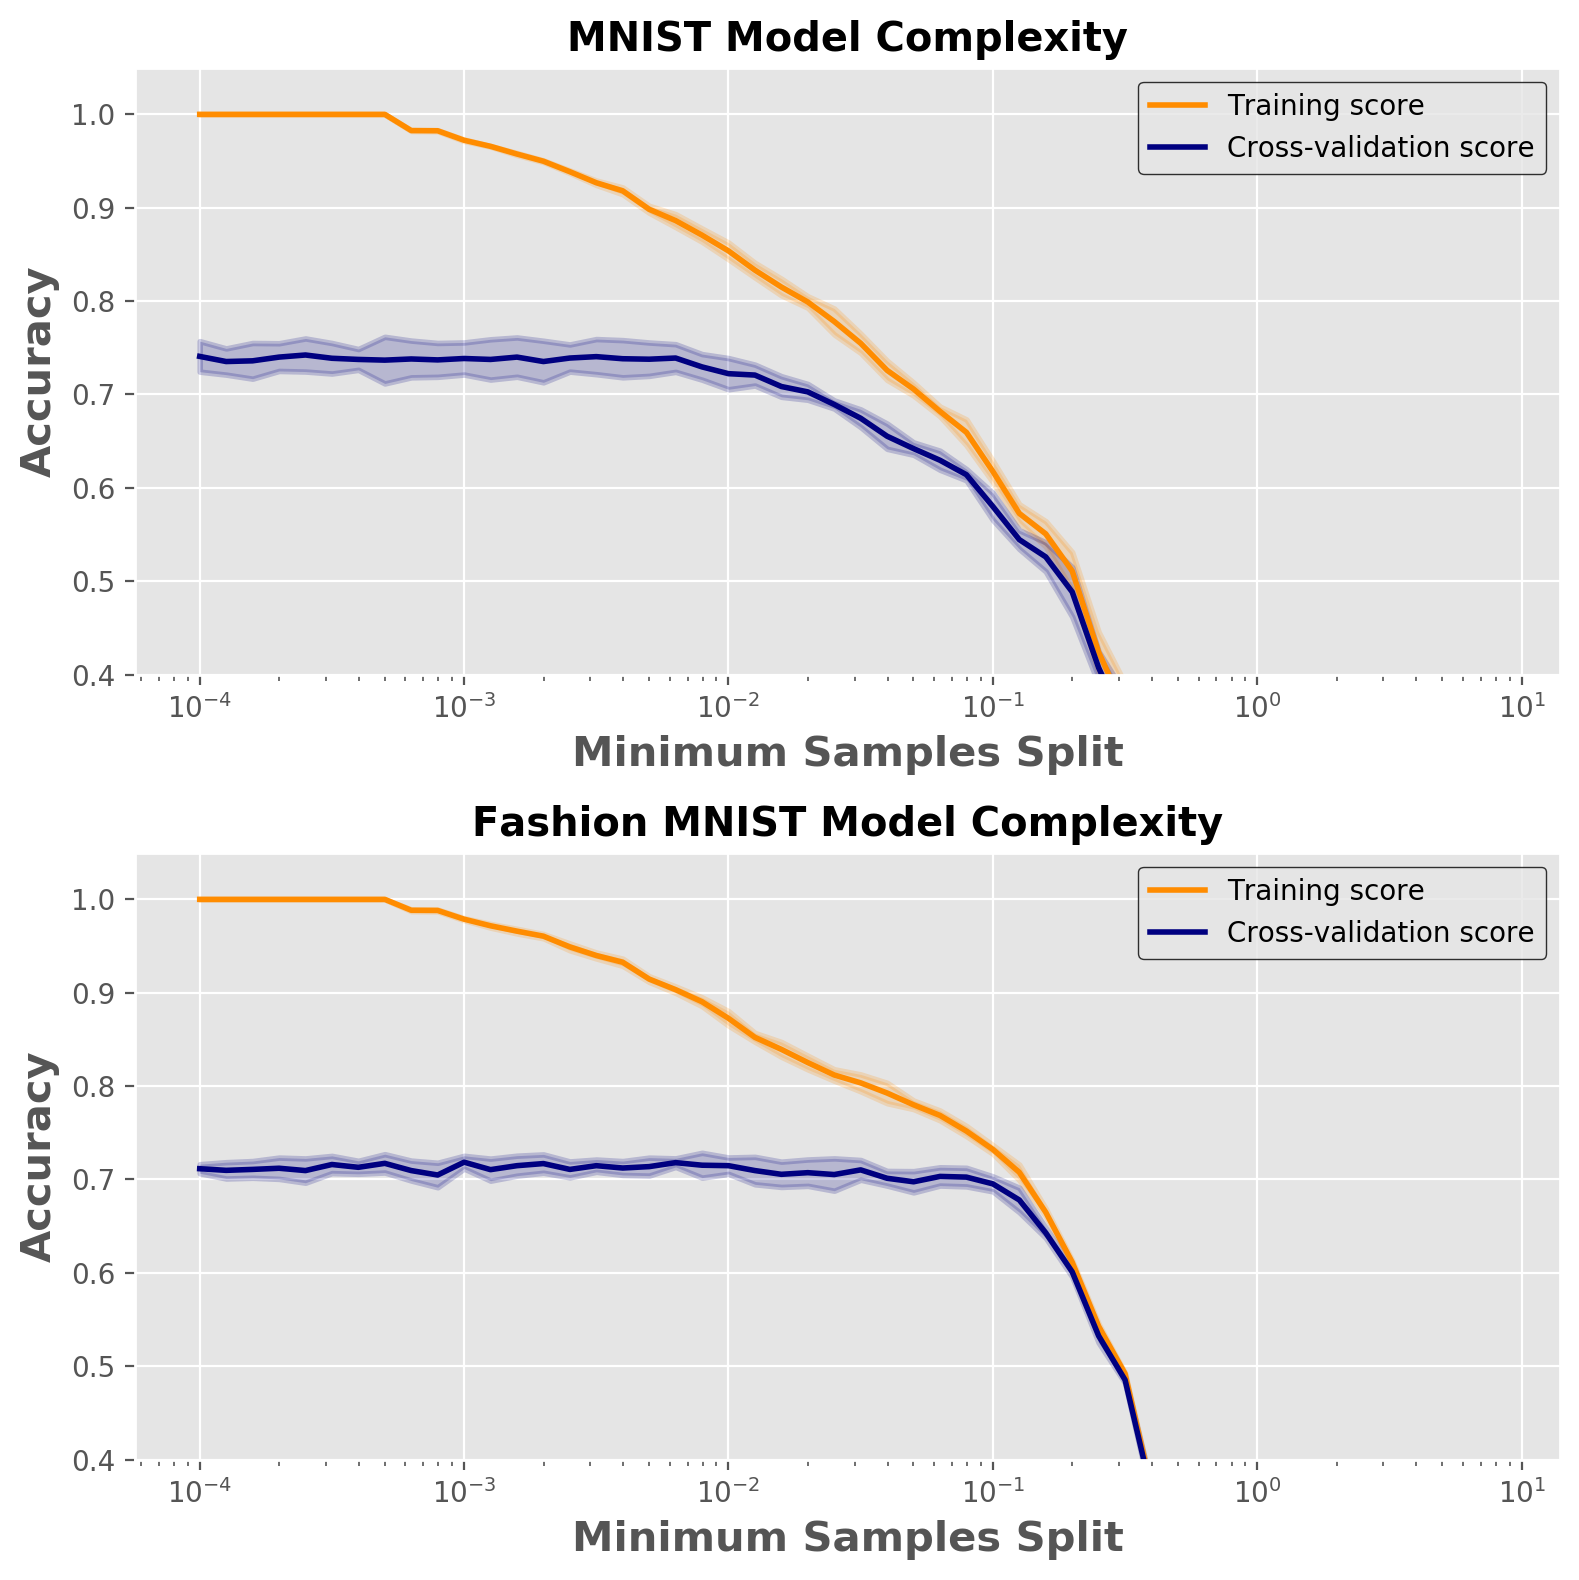

In [42]:
utl.plot_combined_complexity("DecisionTree", "Minimum Samples Split", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results_split, mnist_test_complex=mnist_test_results_split,
                             fashion_train_complex=fashion_train_results_split, extra_name="MinSamplesForSplit_MNIST",
                             fashion_test_complex=fashion_test_results_split, folder="DecisionTree", use_log_x=True)
utl.plot_combined_complexity("DecisionTree", "Minimum Samples Split", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results_split, mnist_test_complex=mnist_test_results_split,
                             fashion_train_complex=fashion_train_results_split, extra_name="MinSamplesForSplit_Fashion_MNIST",
                             fashion_test_complex=fashion_test_results_split, folder="DecisionTree", use_log_x=True)

# Initial Confusion Matrix

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, splitter='best', random_state=Random_Number)
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])
clf2 = DecisionTreeClassifier(max_depth=10, splitter='best', random_state=Random_Number)
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   folder="DecisionTree", extra_name="Initial")

In [ ]:
utl.plot_combined_confusion_matrix(clf, valid_X, valid_y, clf2, fashion_valid_X, fashion_valid_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6,
                                   folder="DecisionTree", extra_name="Initial")

# Initial Learning Curve

In [ ]:

start_time = time.time()
results = []
for i in range(1, 2, 1):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "dt_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
    
    res['dt_results'], res['cv_results'] = utl.plot_learning_curve(
        estimator=DecisionTreeClassifier(random_state=Random_Number, min_samples_split=2, min_samples_leaf=0.001, max_depth=10),
        title=title, train_X=temp_train_X,
        train_y=temp_train_y, cv=cv, f_name=f_name,
        folder="DecisionTree", train_sizes=train_sizes,
        save_individual=True, TESTING=True,
        n_jobs=n_jobs, backend='loky',
        extra_name="InitialLearningCurve")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Initial Metrics

In [ ]:
clf = DecisionTreeClassifier() # need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:val, :], train_y.iloc[:val], valid_X.iloc[:val, :],
                                 valid_y.iloc[:val], folder="DecisionTree", dataset_name="MNIST",
                                 plot_title="Decision Tree")

# Gridsearch

In [54]:
val = 2000
a = 10.** np.arange(-5, 0, 1)

all_parameters = {
    'criterion': ['entropy'],
    'min_samples_leaf': np.sort(np.hstack((a, a*7))),
    'min_samples_split': np.arange(2, 13, 2),
    'max_depth': np.arange(2, 31, 1)
}


# all_parameters
best_mnist_estimator = None
best_fashion_estimator = None

In [55]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        algorithm_name = f"{model_name}_MNIST"
        plot_title = f"{model_name} MNIST\n Model Complexity"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        algorithm_name = f"{model_name}_Fashion_MNIST"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
    
    grid_results_mnist, optimized_dt_mnist = utl.run_grid_search(
        classifier=DecisionTreeClassifier(criterion="entropy", random_state=Random_Number),
        parameters=all_parameters, train_X=temp_train_X,
        train_y=temp_train_y, cv=cv, extra_name="_a_",
        n_jobs=n_jobs, verbose=5, return_train_score=True,
        refit=True, save_dir=save_directory,
        algorithm_name=algorithm_name, backend='loky', folder="DecisionTree")
    if i == 0:
        best_mnist_estimator = optimized_dt_mnist.best_estimator_
    else:
        best_fashion_estimator = optimized_dt_mnist.best_estimator_

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

Fitting 5 folds for each of 1740 candidates, totalling 8700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 1106 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1832 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3264 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4456 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5074 tasks      | el

Fitting 5 folds for each of 1740 candidates, totalling 8700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1714 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2482 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3538 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4104 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4658 tasks      | el

Run Time: 1743.597218990326s


In [57]:
best_mnist_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0007, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [9]:
import pandas as pd
import glob
directory = f"{os.getcwd()}/figures/DecisionTree/Grid_Search_Results/"
files = glob.glob(f"{directory}/*")
file_names = set([i.split("\\")[-1]
                 .split(".")[0] for i in files])

In [31]:
best_mnist_estimator = pd.read_pickle(files[2]).best_estimator_
best_fashion_estimator = pd.read_pickle(files[1]).best_estimator_

In [32]:
best_mnist_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0007, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [33]:
best_fashion_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1e-05, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [34]:
val = 10000

# Final Learning Curve

Working on learning curve: 0
[learning_curve] Training set sizes: [ 400  800 1200 1600 2000 2400 2800 3199 3599 3999 4399 4800 5200 5600
 6000 6399 6800 7200 7600 8000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    2.3s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    6.7s remaining:   44.6s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    9.9s remaining:   31.5s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   14.1s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   17.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   21.5s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   24.9s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   29.0s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   32.8s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.9s finished


Working on learning curve: 1
[learning_curve] Training set sizes: [ 400  800 1200 1600 2000 2400 2800 3199 3599 3999 4399 4800 5200 5600
 6000 6399 6800 7200 7600 8000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.7s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   11.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   19.2s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   29.4s remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   36.6s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   46.9s remaining:   35.4s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   54.8s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  1.1min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  1.2min remaining:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


Run Time: 165.29134464263916s


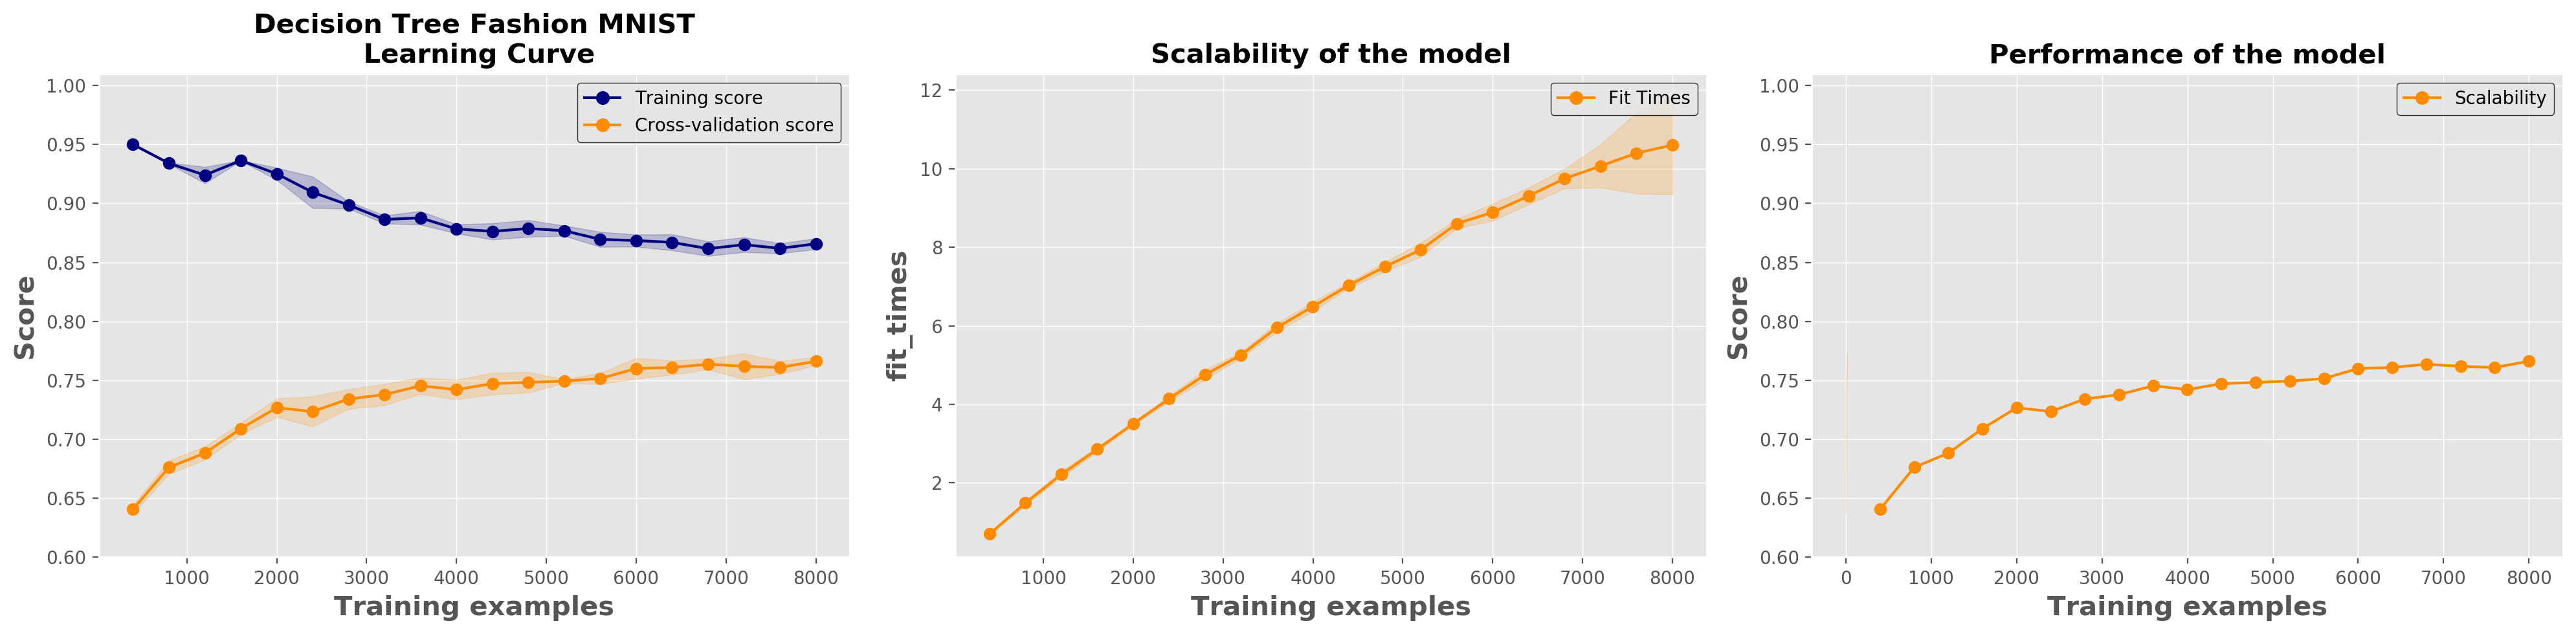

In [35]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "dt_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
        ex="MNIST_Final_Learning_Curve"
        optimized_dt = best_mnist_estimator
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        ex="Fashion_MNIST_Final_Learning_Curve"
        optimized_dt = best_fashion_estimator
    
    res['dt_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_dt,
                                                                   title=title, train_X=temp_train_X,
                                                                   train_y=temp_train_y, cv=cv, f_name=f_name,
                                                                   folder="DecisionTree", train_sizes=train_sizes,
                                                                   save_individual=True, TESTING=True,
                                                                   n_jobs=n_jobs, backend='loky',
                                                                   extra_name=ex)
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Final Confusion Matrix

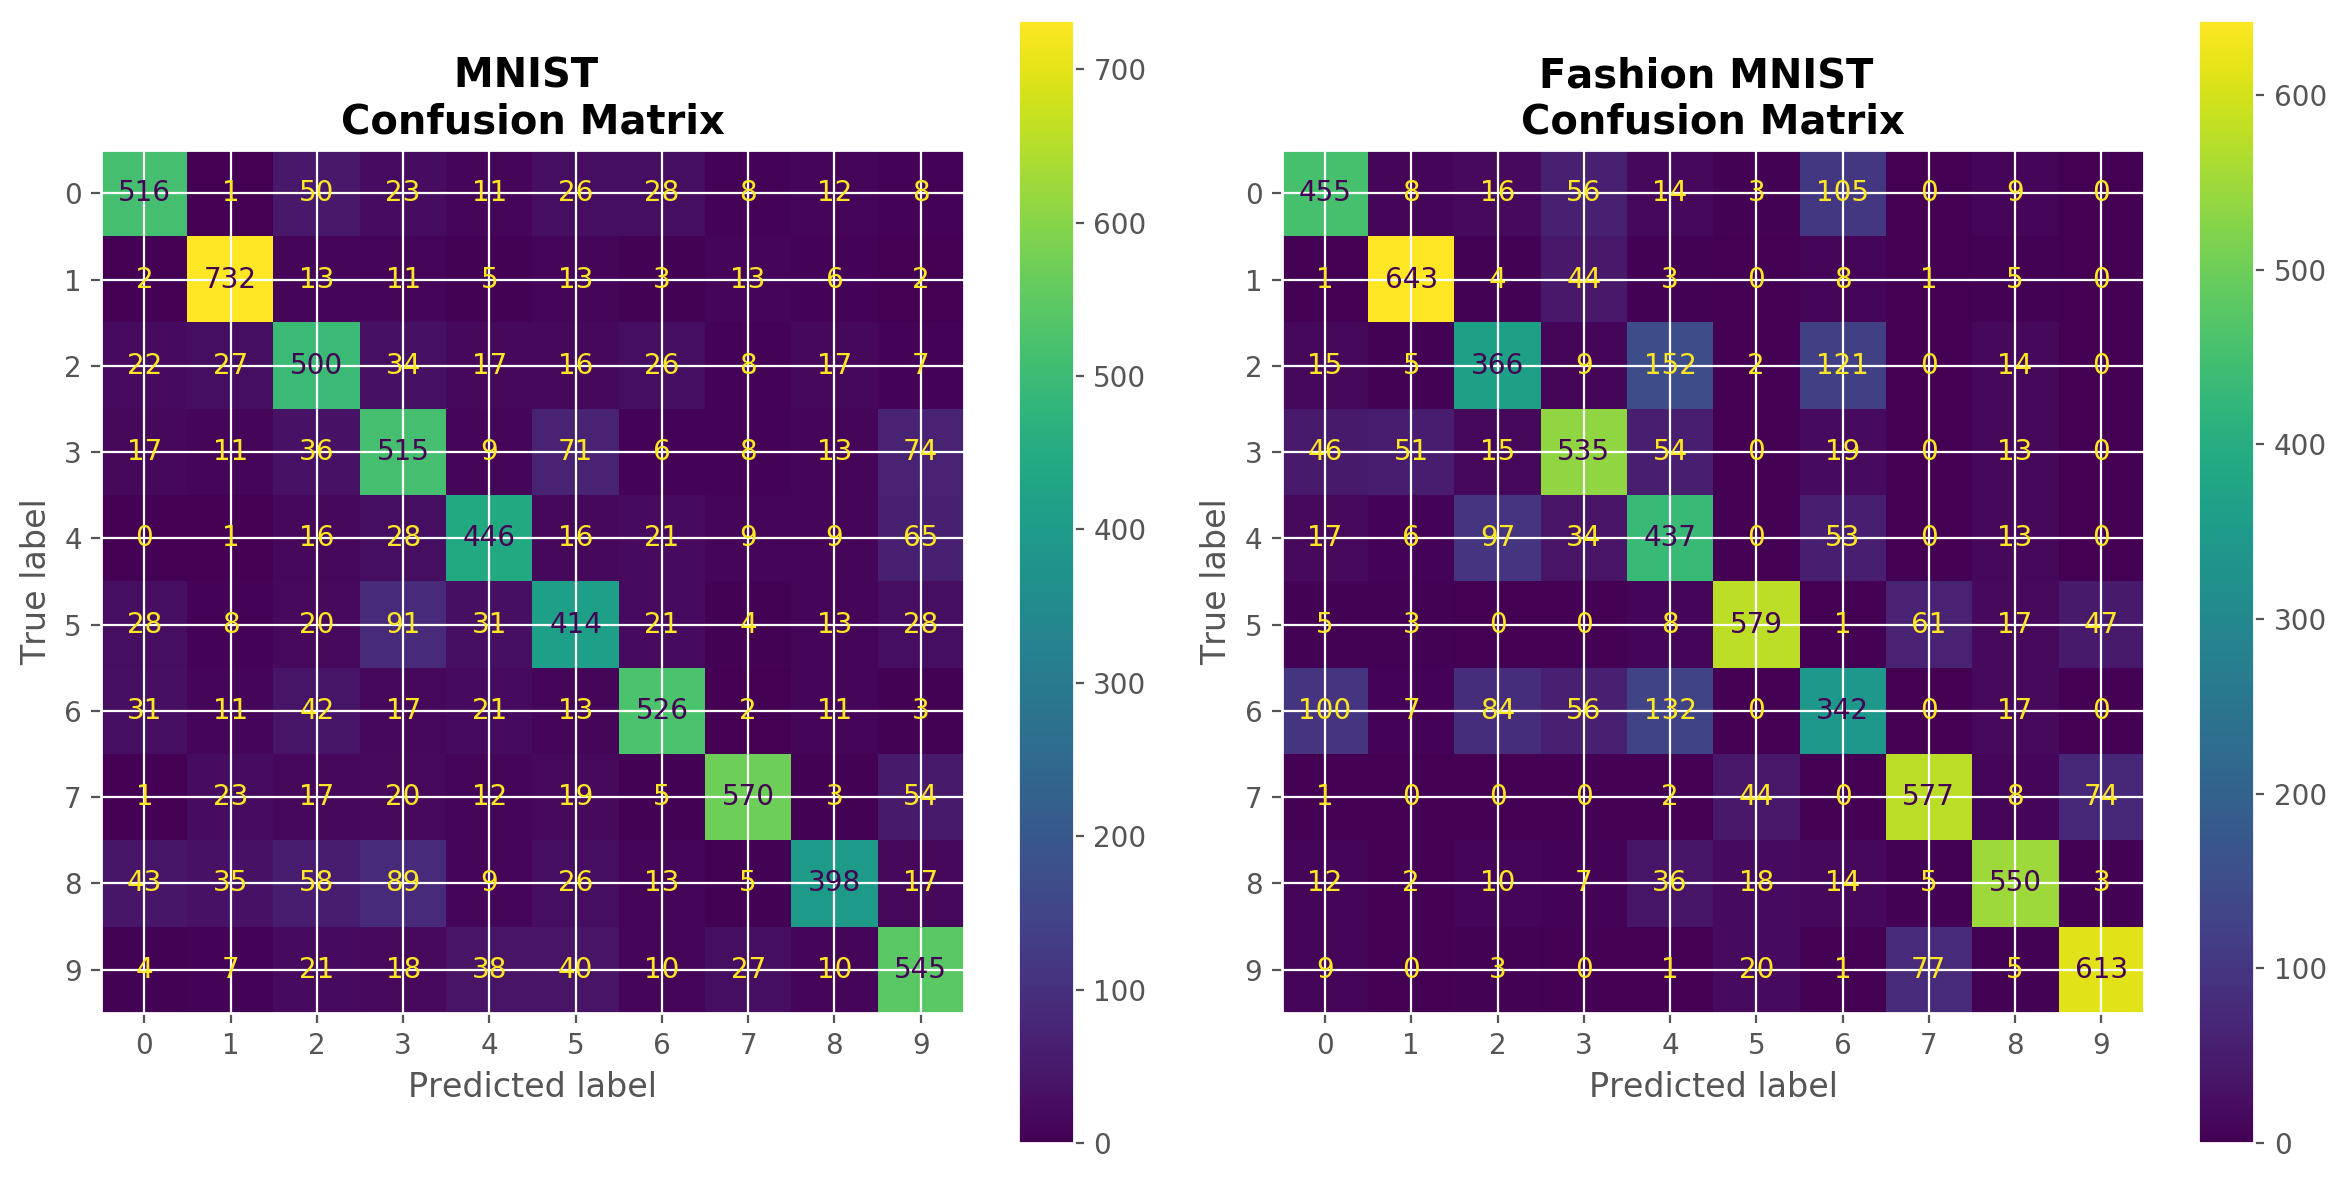

In [36]:
utl.plot_combined_confusion_matrix(best_mnist_estimator, test_X, test_y,
                                   best_fashion_estimator, fashion_test_X,
                                   fashion_test_y,
                                   directory=save_directory, fmt="d", plot_width=12, plot_height=6,
                                   extra_name="Decision_conf_Tree_Final", folder="DecisionTree")

# Final Metrics

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val], test_X.iloc[:val, :],
                                     test_y.iloc[:val], folder="DecisionTree", dataset_name="MNIST",
                                     plot_title="Decision Tree Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_fashion_estimator, fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val], 
                                     fashion_test_X.iloc[:val, :],
                                 fashion_test_y.iloc[:val], folder="DecisionTree", dataset_name="Fashion MNIST",
                                 plot_title="Decision Tree Test Set", is_final=True)

In [ ]:
best_mnist_estimator